In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
np.set_printoptions(threshold=np.nan)

In [26]:
data = pd.read_csv("../Data/preprocessed_alcoholdata_mad_std.csv") 

data = data.drop(['Unnamed: 0'], axis=1)
data['Conditie'] = data['Conditie'].map({'norm': 0,  'bril': 1})
data

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Alcohol,Height,Weight,Age,BMI,AverageStepLength,mad_SegmentData,std_SegmentData
0,006A01',0,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,0.00,177,70.0,20,22.343516,0.610128,0.048709,0.060870
1,006A01',0,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,0.00,177,70.0,20,22.343516,0.681944,0.031206,0.038465
2,006A01',0,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,0.00,177,70.0,20,22.343516,0.713798,0.022252,0.030903
3,006A01',0,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,0.00,177,70.0,20,22.343516,0.651639,0.060879,0.074751
4,009A01',0,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,0.00,195,86.0,23,22.616700,0.768314,0.025316,0.028861
5,009A01',0,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,0.00,195,86.0,23,22.616700,0.685495,0.024061,0.029494
6,009A01',0,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,0.00,195,86.0,23,22.616700,0.689099,0.015080,0.017266
7,009A01',0,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,0.00,195,86.0,23,22.616700,0.660362,0.013693,0.015360
8,010A01',0,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,0.00,165,65.0,28,23.875115,0.538055,0.056155,0.068683
9,010A01',0,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,0.00,165,65.0,28,23.875115,0.571604,0.021438,0.024063


In [27]:
sidlist = data['SubjectID'].unique()

#Make an array out of all rows for every unique SubjectID and list them together
grouped_data = [data[data['SubjectID']==sid] for sid in sidlist]


In [28]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    np.random.shuffle(data)
    N = len(data)
    training = data[:int(ratio*N)]
    validation = data[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data):
    return pd.DataFrame(np.vstack(data), columns=['TestID', 'Conditie', 'SubjectID','SegmentNr','WalkingDirection',        
 'SegmentData', 'Alcohol', 'Height', 'Weight', 'Age', 'BMI', 'AverageStepLength', 'mad_SegmentData', 'std_SegmentData'])

training,validation = validation_split(grouped_data, 0.7)
training = flatten(training)
validation = flatten(validation)


In [29]:
training_matrix = training.as_matrix()
X_train = np.array(training_matrix[:,[12, 11]], dtype=float)
y_train = np.array(training_matrix[:, 1], dtype=int)
validation_matrix = validation.as_matrix()
X_test = np.array(validation_matrix[:,[12, 11]], dtype=float)
y_test = np.array(validation_matrix[:, 1], dtype=int)

Logistic regression accuracy 0.8218085106382979
Confusion matrix, without normalization
[[168  20]
 [ 47 141]]
Normalized confusion matrix
[[0.89 0.11]
 [0.25 0.75]]


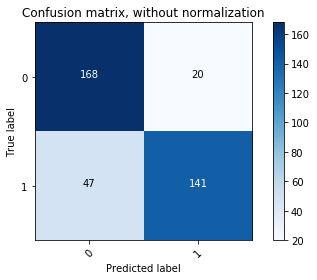

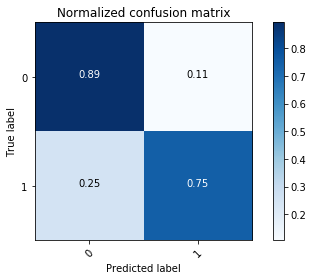

In [30]:
#Logistic regression accuracy

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# print(classification_report(y_test, y_pred))
print('Logistic regression accuracy', accuracy_score(y_test, y_pred))
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Decision tree accuracy 0.75
Confusion matrix, without normalization
[[145  43]
 [ 51 137]]
Normalized confusion matrix
[[0.77 0.23]
 [0.27 0.73]]


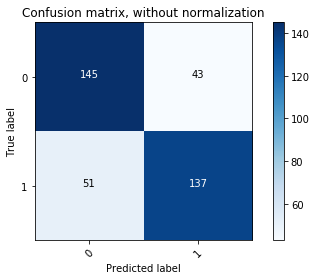

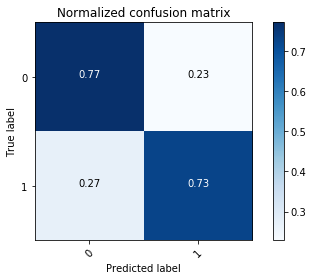

In [31]:
#Decision tree accuracy

clf = tree.DecisionTreeClassifier(random_state=100000)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Decision tree accuracy', accuracy_score(y_test, y_pred))

class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Bayes classifier accuracy 0.8085106382978723
Confusion matrix, without normalization
[[173  15]
 [ 57 131]]
Normalized confusion matrix
[[0.92 0.08]
 [0.3  0.7 ]]


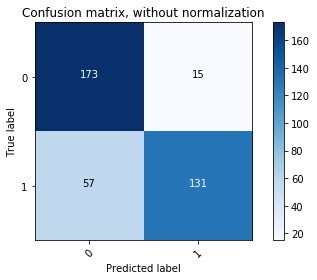

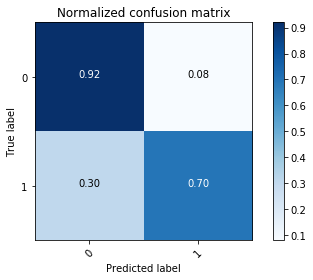

In [32]:
#Bayes classifier

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Bayes classifier accuracy', accuracy_score(y_test, y_pred))

# print(metrics.confusion_matrix(y_test, y_pred))

# # predictions = clf.predict(inputs)
# for input, prediction, label in zip(X_test, y_pred, y_test):
#     if prediction != label:
#         print(input, 'has been classified as ', prediction, 'and should be ', label) 

class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Neural network accuracy 0.8164893617021277
Confusion matrix, without normalization
[[171  17]
 [ 52 136]]
Normalized confusion matrix
[[0.91 0.09]
 [0.28 0.72]]


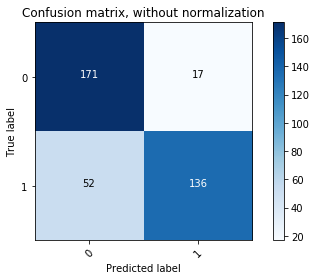

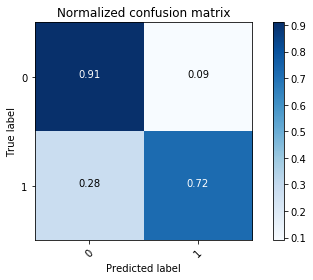

In [33]:
#Neural network

neu = MLPClassifier(random_state=100000, max_iter=1000)
neu = neu.fit(X_train, y_train)  
y_pred = neu.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Neural network accuracy',accuracy_score(y_test, y_pred))
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

SVM accuracy 0.8138297872340425
Confusion matrix, without normalization
[[177  11]
 [ 59 129]]
Normalized confusion matrix
[[0.94 0.06]
 [0.31 0.69]]


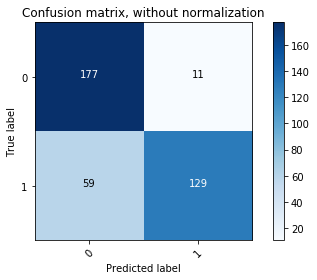

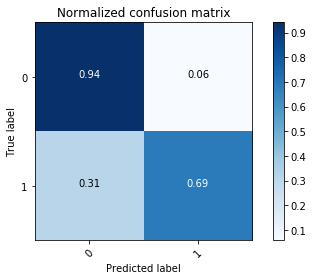

In [34]:
#SVM
cl = SVC(gamma='auto', class_weight='balanced', max_iter=100000)
cl.fit(X_train, y_train) 

y_pred = cl.predict(X_test)

# print(classification_report(y_test, y_pred))
print('SVM accuracy',accuracy_score(y_test, y_pred.round()))
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

K-NN accuracy 0.8111702127659575
Confusion matrix, without normalization
[[169  19]
 [ 52 136]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.28 0.72]]


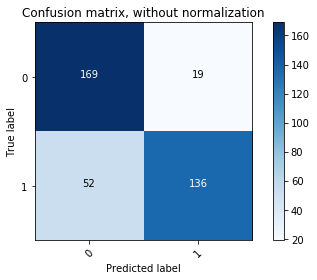

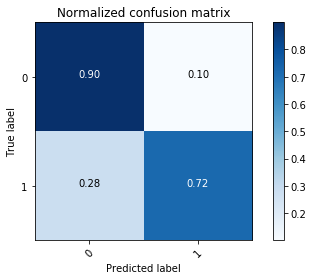

In [35]:
#K-NN

neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

# print(classification_report(y_test, y_pred))
print('K-NN accuracy',accuracy_score(y_test, y_pred.round()))

class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()